# MNIST Classification - Five Layer NN

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
tf.set_random_seed(0)

In [2]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [39]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# weights
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.zeros([200]))
b2 = tf.Variable(tf.zeros([100]))
b3 = tf.Variable(tf.zeros([60]))
b4 = tf.Variable(tf.zeros([30]))
b5 = tf.Variable(tf.zeros([10]))

In [40]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [41]:
# The model
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + b1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + b2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + b3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + b4)
logits = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(logits)

In [66]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [67]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [68]:
# to keep track of max accuracy
max_accuracy = 0.0

In [69]:
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)

In [70]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [71]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [72]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.06 loss: 236.88962
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.0958 test loss: 233.09715
10: accuracy:0.13 loss: 229.581
20: accuracy:0.09 loss: 232.58278
30: accuracy:0.11 loss: 231.84457
40: accuracy:0.1 loss: 231.71255
50: accuracy:0.07 loss: 231.6285
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.1135 test loss: 231.11069
60: accuracy:0.13 loss: 230.53194
70: accuracy:0.06 loss: 231.74272
80: accuracy:0.12 loss: 231.68675
90: accuracy:0.12 loss: 230.70573
100: accuracy:0.16 loss: 230.22443
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.1028 test loss: 231.56136
110: accuracy:0.1 loss: 230.67513
120: accuracy:0.06 loss: 233.05798
130: accuracy:0.13 loss: 230.39517
140: accuracy:0.13 loss: 233.26627
150: accuracy:0.09 loss: 230.16388
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.0982 test loss: 230.95847
160: accuracy:0.09 loss: 230.09015
170: accuracy:0.11 loss: 230.67068
180: accuracy:0.14 loss: 229.57945
190: accuracy:0.05 loss: 231.42996
200: accuracy:0.09 loss: 232.64

1710: accuracy:0.62 loss: 92.00787
1720: accuracy:0.71 loss: 79.47125
1730: accuracy:0.64 loss: 104.530464
1740: accuracy:0.71 loss: 84.865906
1750: accuracy:0.64 loss: 95.13212
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.6668 test loss: 91.90409
1760: accuracy:0.67 loss: 97.05087
1770: accuracy:0.64 loss: 103.06621
1780: accuracy:0.72 loss: 83.32274
1790: accuracy:0.73 loss: 94.44433
1800: accuracy:0.72 loss: 84.27845
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.6926 test loss: 92.04954
1810: accuracy:0.82 loss: 70.51276
1820: accuracy:0.82 loss: 70.50788
1830: accuracy:0.71 loss: 90.96782
1840: accuracy:0.75 loss: 88.68591
1850: accuracy:0.78 loss: 68.10868
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.7584 test loss: 79.92832
1860: accuracy:0.76 loss: 78.29954
1870: accuracy:0.81 loss: 61.412586
1880: accuracy:0.74 loss: 62.292583
1890: accuracy:0.75 loss: 71.17705
1900: accuracy:0.72 loss: 81.57452
1900: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.8057 test loss: 68.87006
1910: 

3410: accuracy:0.96 loss: 12.12549
3420: accuracy:0.91 loss: 31.173792
3430: accuracy:0.96 loss: 13.822025
3440: accuracy:0.92 loss: 30.816051
3450: accuracy:0.96 loss: 15.007263
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9364 test loss: 23.454472
3460: accuracy:0.89 loss: 28.945866
3470: accuracy:0.92 loss: 33.599384
3480: accuracy:0.93 loss: 24.698532
3490: accuracy:0.91 loss: 25.083658
3500: accuracy:0.93 loss: 28.776663
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9339 test loss: 23.594028
3510: accuracy:0.97 loss: 15.42946
3520: accuracy:0.95 loss: 19.088667
3530: accuracy:0.94 loss: 20.353947
3540: accuracy:0.93 loss: 18.692183
3550: accuracy:0.91 loss: 24.988089
3550: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.935 test loss: 22.884436
3560: accuracy:0.88 loss: 44.39431
3570: accuracy:0.92 loss: 27.173306
3580: accuracy:0.9 loss: 24.647564
3590: accuracy:0.97 loss: 13.693041
3600: accuracy:0.95 loss: 30.608692
3600: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9366 test loss: 22.

5050: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9523 test loss: 16.21439
5060: accuracy:0.95 loss: 18.084133
5070: accuracy:0.95 loss: 21.306162
5080: accuracy:0.93 loss: 31.049576
5090: accuracy:0.95 loss: 20.780663
5100: accuracy:0.97 loss: 21.66464
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9506 test loss: 16.482002
5110: accuracy:0.96 loss: 15.689861
5120: accuracy:0.95 loss: 16.077057
5130: accuracy:0.93 loss: 29.00307
5140: accuracy:0.94 loss: 16.913424
5150: accuracy:0.94 loss: 24.294043
5150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9534 test loss: 16.096481
5160: accuracy:0.96 loss: 10.398581
5170: accuracy:0.97 loss: 17.665136
5180: accuracy:0.99 loss: 9.476223
5190: accuracy:0.96 loss: 13.249503
5200: accuracy:0.95 loss: 16.96109
5200: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9506 test loss: 16.627817
5210: accuracy:0.92 loss: 28.184881
5220: accuracy:0.96 loss: 20.0977
5230: accuracy:0.96 loss: 18.705639
5240: accuracy:0.94 loss: 28.576214
5250: accuracy:0.96 loss: 10.77

6690: accuracy:0.95 loss: 12.297897
6700: accuracy:0.95 loss: 20.410162
6700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9587 test loss: 14.602059
6710: accuracy:0.95 loss: 23.294247
6720: accuracy:0.98 loss: 7.5724087
6730: accuracy:0.94 loss: 16.03326
6740: accuracy:0.97 loss: 12.692126
6750: accuracy:0.97 loss: 9.745346
6750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9619 test loss: 13.159953
6760: accuracy:0.94 loss: 28.0407
6770: accuracy:0.95 loss: 16.133535
6780: accuracy:0.99 loss: 8.41463
6790: accuracy:0.97 loss: 7.15076
6800: accuracy:0.95 loss: 19.965794
6800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9614 test loss: 13.633752
6810: accuracy:0.96 loss: 11.206735
6820: accuracy:0.98 loss: 5.4377246
6830: accuracy:0.95 loss: 18.479633
6840: accuracy:0.98 loss: 9.195761
6850: accuracy:1.0 loss: 2.7592642
6850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9531 test loss: 15.361066
6860: accuracy:0.98 loss: 4.6717844
6870: accuracy:0.99 loss: 4.1295023
6880: accuracy:0.95 loss: 16.68823

8350: accuracy:0.98 loss: 7.6321454
8350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9671 test loss: 10.98128
8360: accuracy:1.0 loss: 2.0105867
8370: accuracy:0.97 loss: 9.515832
8380: accuracy:0.98 loss: 6.5385127
8390: accuracy:0.98 loss: 8.631999
8400: accuracy:1.0 loss: 1.884574
8400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9655 test loss: 11.414988
8410: accuracy:0.93 loss: 17.89056
8420: accuracy:0.95 loss: 19.36305
8430: accuracy:0.96 loss: 15.887616
8440: accuracy:0.97 loss: 5.620587
8450: accuracy:0.97 loss: 9.023635
8450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9683 test loss: 10.997886
8460: accuracy:0.97 loss: 5.0150385
8470: accuracy:0.97 loss: 7.1226077
8480: accuracy:0.98 loss: 3.6283336
8490: accuracy:0.98 loss: 3.9046977
8500: accuracy:0.95 loss: 15.056084
8500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9694 test loss: 10.767312
8510: accuracy:0.97 loss: 7.7299623
8520: accuracy:0.99 loss: 2.306126
8530: accuracy:0.96 loss: 12.982683
8540: accuracy:0.98 loss: 12.062606

9990: accuracy:0.98 loss: 7.0848303
10000: accuracy:0.98 loss: 5.586668
10000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9687 test loss: 10.9051075


In [59]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.9784


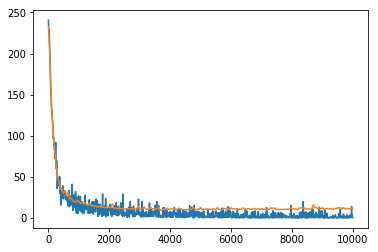

In [60]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
#plt.ylim(top=30, bottom=0)
plt.show()

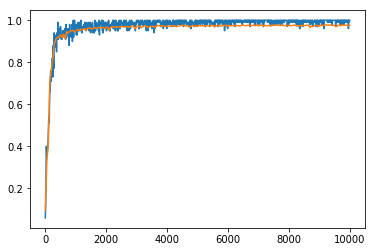

In [61]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
#plt.ylim(top = 1, bottom=.9)
plt.show()